In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import polars as pl
import numpy as np

import polars.selectors as cs

In [5]:
df_path = r"C:\Users\Zygim\Downloads\archive (1)\bitcoin_2010-07-17_2024-06-28.csv"

In [6]:
df = pl.read_csv(df_path)

# Data Preprocessing

## 1. Handling Missing Data: Check for missing values in the dataset and handle them using imputation techniques like SimpleImputer from Scikit-learn. Try using both mean and median for imputation.

In [7]:
df.null_count()

Start,End,Open,High,Low,Close,Volume,Market Cap
u32,u32,u32,u32,u32,u32,u32,u32
0,0,0,0,0,0,0,0


## 2. Feature Scaling: Scale the Open, Close, High, Low, Volume, and Market Cap features using StandardScaler and MinMaxScaler. Compare the differences.

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [9]:
df

Start,End,Open,High,Low,Close,Volume,Market Cap
str,str,f64,f64,f64,f64,f64,f64
"""2024-06-27""","""2024-06-28""",60882.9,62338.43,60666.19,61646.05,1.2159e11,1.2084e12
"""2024-06-26""","""2024-06-27""",61733.99,62357.58,60761.24,60761.24,1.0176e11,1.2105e12
"""2024-06-25""","""2024-06-26""",60317.99,62231.16,60272.58,61789.98,1.0503e11,1.2084e12
"""2024-06-24""","""2024-06-25""",63168.03,63316.01,58946.24,60382.81,8.8284e10,1.2111e12
"""2024-06-23""","""2024-06-24""",64276.04,64521.03,63290.43,63290.43,6.8539e10,1.2653e12
…,…,…,…,…,…,…,…
"""2010-07-21""","""2010-07-22""",0.0792,0.0792,0.0792,0.0792,0.0,0.0
"""2010-07-20""","""2010-07-21""",0.0747,0.0747,0.0747,0.0747,0.0,0.0
"""2010-07-19""","""2010-07-20""",0.0808,0.0808,0.0808,0.0808,0.0,0.0


In [10]:
standard_scaler = StandardScaler()
min_max_scaler = MinMaxScaler()

In [11]:
df.columns

['Start', 'End', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap']

In [12]:
features = ['Open', 'Close', 'High', 'Low',]

In [13]:
data_features = df[features]

In [14]:
data_standard_scaler = standard_scaler.fit_transform(data_features)

In [15]:
data_minmax_scaled = min_max_scaler.fit_transform(data_features)

In [16]:
data_standard_scaled_df = pl.DataFrame(data_standard_scaler, schema=features)

In [17]:
data_min_max_scaled_df = pl.DataFrame(data_minmax_scaled, schema=features)

In [18]:
print("Standard Scaled Data (First 5 rows):")
data_standard_scaled_df.head()

Standard Scaled Data (First 5 rows):


Open,Close,High,Low
f64,f64,f64,f64
2.815638,2.856053,2.820294,2.888499
2.864492,2.80531,2.821369,2.894088
2.783211,2.864307,2.814271,2.865352
2.946809,2.783607,2.875176,2.787355
3.010411,2.950357,2.942828,3.04282


In [19]:
print("\nMinMax Scaled Data (First 5 rows):")
data_min_max_scaled_df.head()


MinMax Scaled Data (First 5 rows):


Open,Close,High,Low
f64,f64,f64,f64
0.834458,0.84345,0.846662,0.85046
0.846123,0.831344,0.846922,0.851793
0.826715,0.845419,0.845205,0.844942
0.865778,0.826166,0.85994,0.826349
0.880964,0.865949,0.876306,0.887249


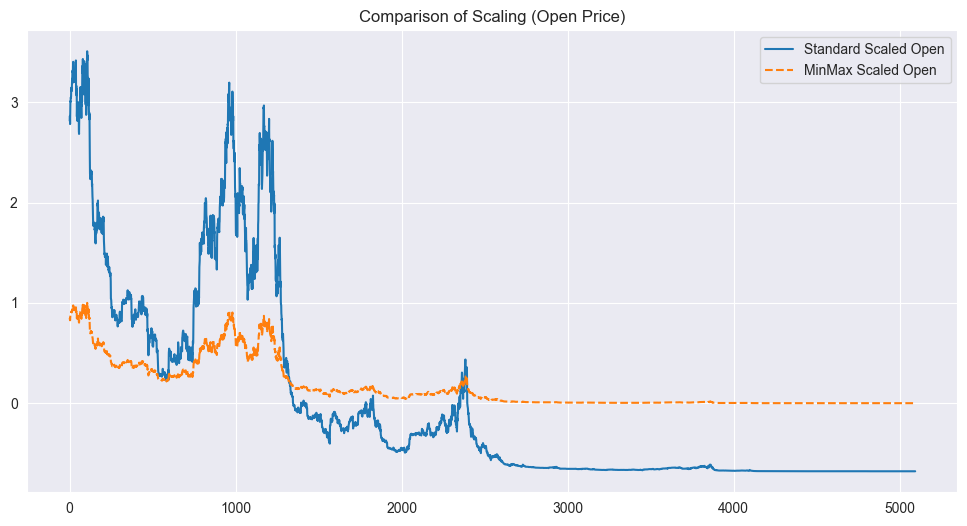

In [20]:
plt.figure(figsize=(12,6))
plt.plot(data_standard_scaled_df['Open'], label='Standard Scaled Open')
plt.plot(data_min_max_scaled_df['Open'], label='MinMax Scaled Open', linestyle='--')
plt.title('Comparison of Scaling (Open Price)')
plt.legend()
plt.show()

## 3. Train-Test Split: Split the dataset into a training and testing set using train_test_split for later model training (e.g., 80/20 split).

In [21]:
from sklearn.model_selection import train_test_split

In [26]:
X = df['Open', 'High', 'Low', 'Volume', 'Market Cap']
y = df['Close']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

## 4. Feature Selection: Use SelectKBest to select the top 3 features with the highest correlation with the Close price.

In [29]:
from sklearn.feature_selection import SelectKBest, f_regression

In [30]:
selector = SelectKBest(score_func=f_regression, k=3)
X_new = selector.fit_transform(X, y)

In [31]:
selected_features = selector.get_support(indices=True)

In [39]:
selected_feature_names = [X.columns[i] for i in selected_features]

In [40]:
feature_scores = selector.scores_[selected_features]

In [41]:
print("Selected Features:", selected_feature_names)
print("Feature Scores:", feature_scores)

Selected Features: ['High', 'Low', 'Market Cap']
Feature Scores: [7006727.53494289 5880391.39349542 3463739.76634108]


In [42]:
print("\nDataset with top 3 selected features:")
print(pd.DataFrame(X_new, columns=selected_feature_names).head())


Dataset with top 3 selected features:
       High       Low    Market Cap
0  62338.43  60666.19  1.208392e+12
1  62357.58  60761.24  1.210544e+12
2  62231.16  60272.58  1.208415e+12
3  63316.01  58946.24  1.211101e+12
4  64521.03  63290.43  1.265327e+12
